# Titanic Survival 🚢

In this notebook, predictive analytics study was performed on a Kaggle Competition data set which consists of the passenger survival data of Titanic disaster.

The breakdown of the study is as below:

<ul>
<li>Data exploration</li>
<li>Data transformation</li>
<li>Feature selection</li>
<li>Model construction</li>
</ul>

Data Source: "https://www.kaggle.com/competitions/titanic/data"  

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as pyplot
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### Data Exploration

In [14]:
TrainData = pandas.read_csv('train.csv')
TestData = pandas.read_csv('test.csv')
TrainData.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
459,460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
387,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S


In [15]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
TrainData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [17]:
TargetVariable = 'Survived'
CategoricalVariables = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
ContinuousVariables = ['Age', 'Fare']
RedundantVariables = ['PassengerId', 'Name', 'Ticket', 'Cabin']

### Data Transformation

In [18]:
TrainData['Age'].fillna(TrainData['Age'].mean(), inplace=True)
TrainData['Embarked'].fillna(TrainData['Embarked'].mode()[0], inplace=True)
TrainData['Sex'] = TrainData['Sex'].map({'female':0, 'male':1})
TrainData['Embarked'] = TrainData['Embarked'].map({'C':1, 'S':2, 'Q':3})
TrainData = TrainData.drop(RedundantVariables, axis=1)

TestData['Age'].fillna(TestData['Age'].median(), inplace=True)
TestData['Fare'].fillna(TestData['Fare'].mean(), inplace=True)
TestData['Embarked'].fillna(TestData['Embarked'].mode()[0], inplace=True)
TestData['Sex'] = TestData['Sex'].map({'female':0, 'male':1})
TestData['Embarked'] = TestData['Embarked'].map({'C':1, 'S':2, 'Q':3})

TrainData.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
360,0,3,1,40.000000,1,4,27.9000,2
583,0,1,1,36.000000,0,0,40.1250,1
503,0,3,0,37.000000,0,0,9.5875,2
853,1,1,0,16.000000,0,1,39.4000,2
73,0,3,1,26.000000,1,0,14.4542,1
441,0,3,1,20.000000,0,0,9.5000,2
199,0,2,0,24.000000,0,0,13.0000,2
47,1,3,0,29.699118,0,0,7.7500,3
247,1,2,0,24.000000,0,2,14.5000,2
796,1,1,0,49.000000,0,0,25.9292,2


In [19]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### Feature Selection

Pclass is correlated with target variable
P Value: 4.549251711298793e-23
Sex is correlated with target variable
P Value: 1.1973570627755645e-58
Embarked is correlated with target variable
P Value: 2.3008626481449577e-06
SibSp is correlated with target variable
P Value: 1.5585810465902147e-06
Parch is correlated with target variable
P Value: 9.703526421039996e-05


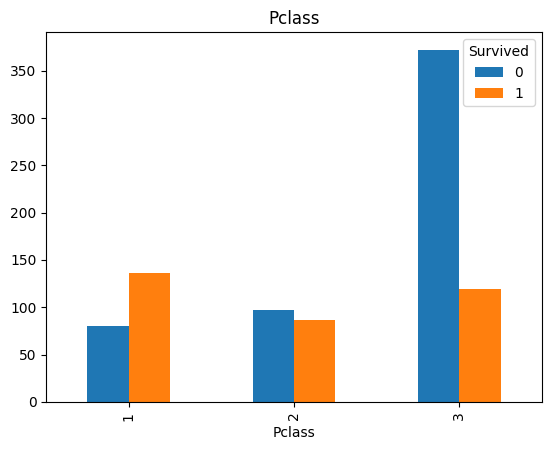

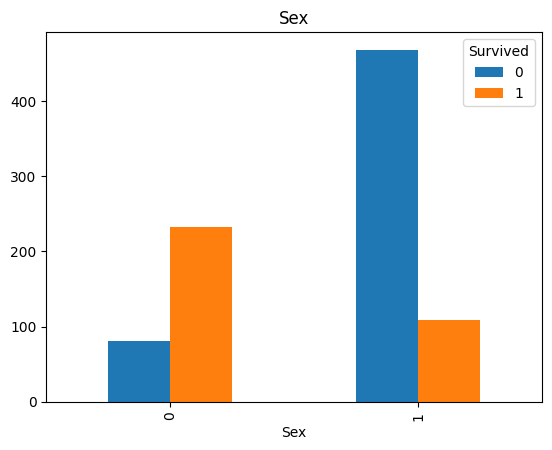

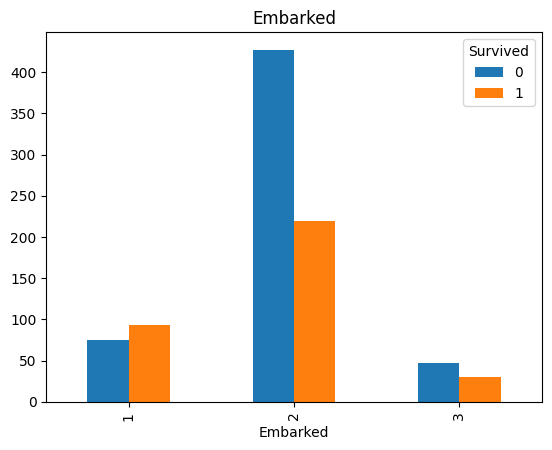

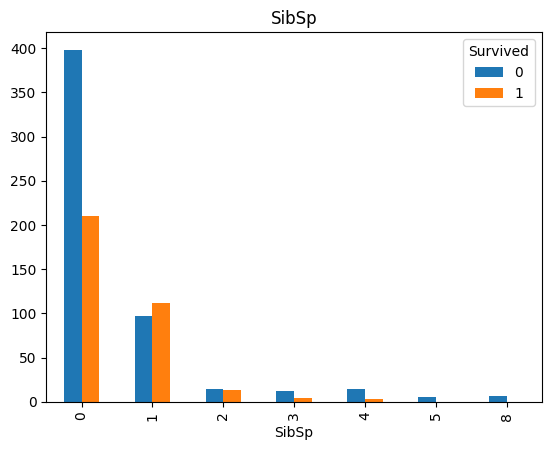

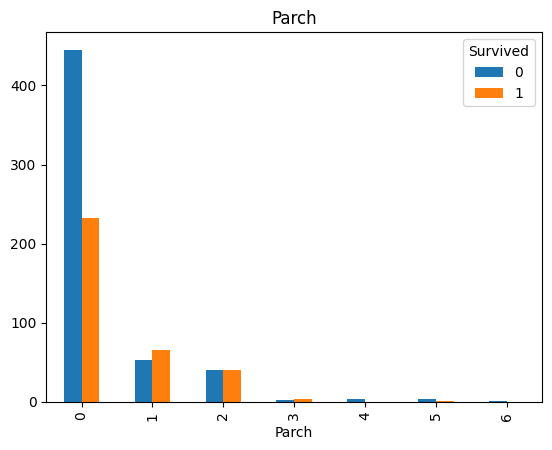

In [20]:
for variable in CategoricalVariables:
    CrossTabDataFrame = pandas.crosstab(index=TrainData[variable], columns=TrainData[TargetVariable])
    CrossTabDataFrame.plot.bar(title=variable)
    ChiSquareTest = chi2_contingency(CrossTabDataFrame)
    if (ChiSquareTest[1] < 0.05):
        print(variable, "is correlated with target variable\nP Value:", ChiSquareTest[1])
    else:
        print(variable, "is not correlated with target variable\nP Value:", ChiSquareTest[1])


Age is correlated with target variable
P Value: 0.0
Fare is correlated with target variable
P Value: 3.23241769608784e-74


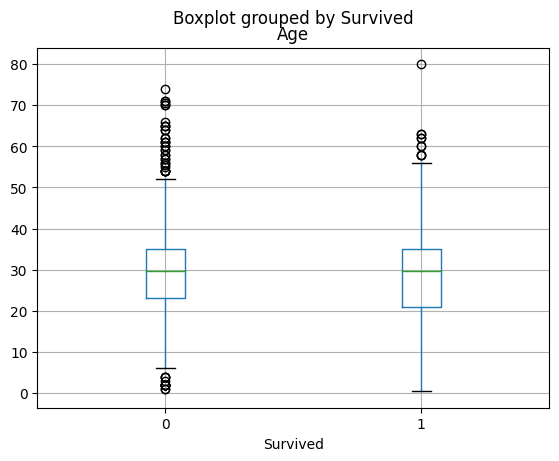

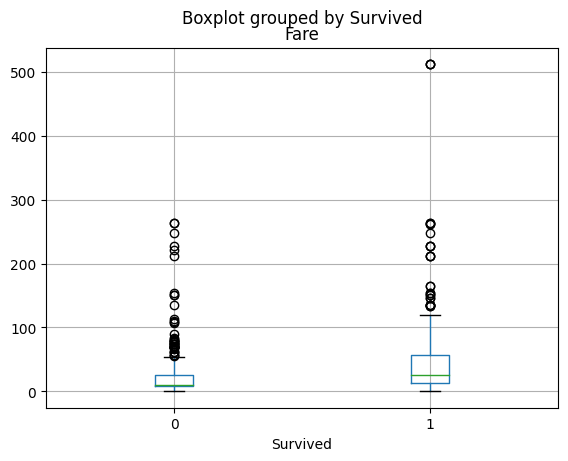

In [21]:
for variable in ContinuousVariables:
    TrainData.boxplot(column=variable, by=TargetVariable)
    AnovaTest = f_oneway(TrainData[TargetVariable], TrainData[variable])
    if (AnovaTest[1] < 0.05):
        print(variable, "is correlated with target variable\nP Value:", AnovaTest[1])
    else:
        print(variable, "is not correlated with target variable\nP Value:", AnovaTest[1])


### Decision Tree

[Text(0.5, 0.9, 'x[1] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.7, 'x[0] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.125, 0.5, 'x[6] <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.0625, 0.3, 'x[6] <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(0.03125, 0.1, 'entropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3, 'x[5] <= 2.5\nentropy = 0.141\nsamples = 100\nvalue = [2, 98]'),
 Text(0.15625, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21875, 0.1, 'entropy = 0.081\nsamples = 99\nvalue = [1, 98]'),
 Text(0.375, 0.5, 'x[6] <= 23.35\nentropy = 1.0\nsamples = 144\nvalue = [72, 72]'),
 Text(0.3125, 0.3, 'x[5] <= 36.5\nentropy = 0.977\nsamples = 117\nvalue = [48, 69]'),
 Text(0.28125, 0.1, 'entropy = 0.959\nsamples = 110\nvalue = [42, 68]'),
 Text(0.34375, 0.1, 'entropy = 0.592\nsamples = 7\nvalue

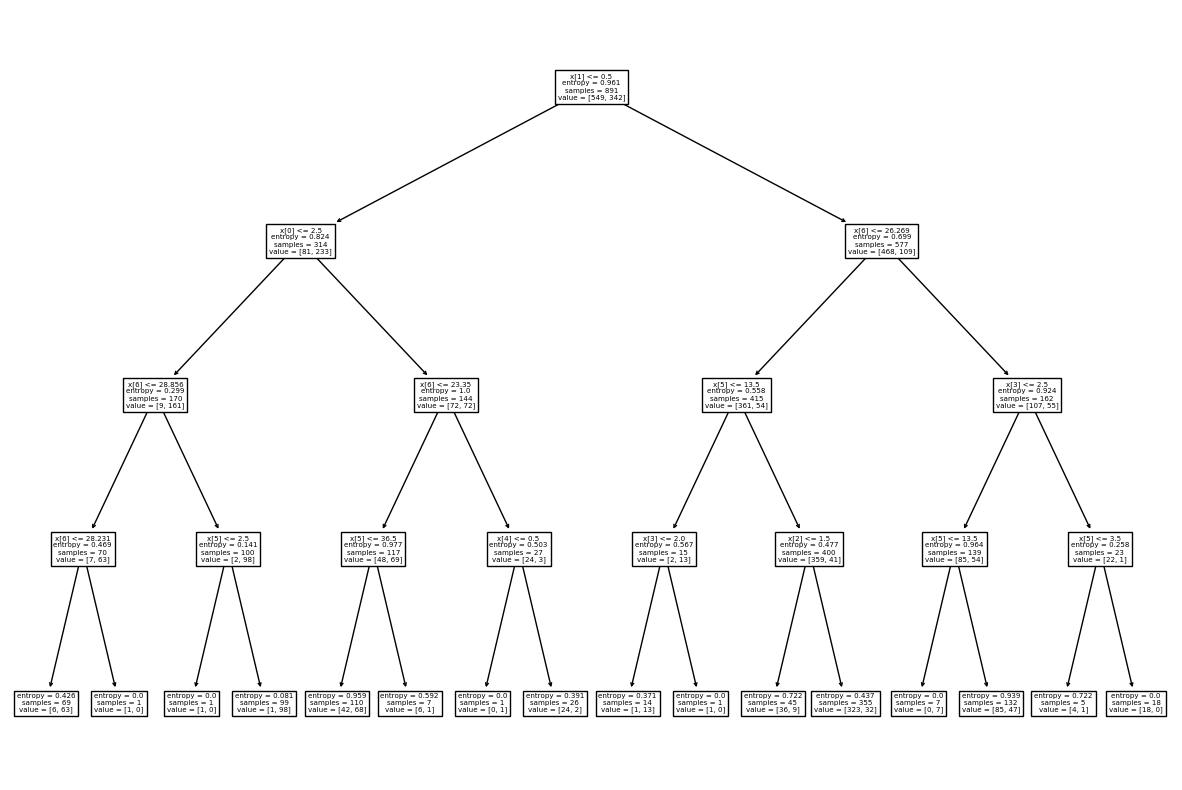

In [22]:
PredictorVariables = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare']

X_train = TrainData[PredictorVariables]
Y_train = TrainData[TargetVariable]
X_test = TestData[PredictorVariables]

DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
DecisionTree.fit(X_train, Y_train)

Y_pred = DecisionTree.predict(X_test)

pyplot.figure(figsize=(15, 10))

plot_tree(DecisionTree)

In [23]:
Submission = pandas.DataFrame({'PassengerId': TestData.PassengerId,
                       'Survived': Y_pred})
Submission.to_csv('Submission.csv', index=False)